In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [38]:
trials=100_00_00       #total simulated events
low=-1;high=1;interval=high-low
test=interval*np.random.rand(trials,3)+low
#test
x=test[:,0]
y=test[:,1]
z=test[:,2]

In [39]:
x

array([ 0.65211596,  0.8528584 ,  0.18587294, ..., -0.97243902,
        0.17280156, -0.98919469])

In [40]:
y

array([-0.47908198,  0.50825905,  0.95750633, ..., -0.36386102,
       -0.18740218, -0.89025816])

In [41]:
z

array([0.108858  , 0.54042741, 0.91488884, ..., 0.16457078, 0.11456313,
       0.55032207])

In [42]:

r=np.sqrt(x**2+y**2+z**2)
r

array([0.81647096, 1.13037892, 1.33730651, ..., 1.05124499, 0.27947212,
       1.44011114])

In [43]:
test=np.column_stack((test,r))

In [44]:
df=pd.DataFrame(test,columns=['x','y','z','r']) #data frame with x,y,z and r
df.head()

,x,y,z,r
0,0.652116,-0.479082,0.108858,0.816471
1,0.852858,0.508259,0.540427,1.130379
2,0.185873,0.957506,0.914889,1.337307
3,-0.704196,0.784624,0.616563,1.221342
4,-0.126587,-0.851976,0.998273,1.318498


In [45]:
df_less=df[df.r<0.5]          #data frame with r<0.5 (radius of the bead)
df_less.head()
total_counts=df_less.shape[0]
total_counts

65343

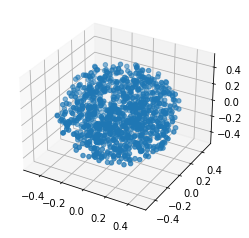

In [46]:
%matplotlib inline
df_sample=df_less.head(1000)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_sample.x,df_sample.y,df_sample.z)

In [47]:
#this function give the normal distance from a point to the surface of the sphere

def get_upward_distance(x,y,z,dz=0.001,r=0.5):
    '''
    returns normal distance from a point in the sphere to the surface as well as the z co-ordinate in the sphere
    '''
    #z=np.abs(z)
    d=np.sqrt(x**2+y**2+z**2)
    if z==-0.5: return 1.0,0.5 #z_up, z
    z_up=0
    #print(f"before while z_up: {z_up}")
    while(d<r):
        z+=dz
        #print(f"Inside while z: {z}")
        z_up+=dz
        d=np.sqrt(x**2+y**2+z**2)
    #print(f"after while z_up: {z_up}")
    return z_up,z
        
    

In [48]:
#distance travelled in the bead

df_less['z_new']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
df_less['d_bead']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)
df_less.head()

/tmp/ipykernel_8166/2709360843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['z_new']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[1],axis=1)
/tmp/ipykernel_8166/2709360843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['d_bead']=df_less.apply(lambda x:get_upward_distance(x['x'],x['y'],x['z'])[0],axis=1)


,x,y,z,r,z_new,d_bead
24,-0.163965,-0.385655,-0.252727,0.489372,0.273273,0.526
36,-0.175837,-0.214730,-0.114440,0.300207,0.416560,0.531
44,0.136687,0.244398,0.209056,0.349454,0.415056,0.206
59,0.099210,-0.090670,0.065817,0.149651,0.481817,0.416
75,-0.177307,-0.201685,-0.319197,0.417135,0.421803,0.741


In [49]:
#distance travelled in the button
button_thickness=3.0
df_less.['d_button']=button_thickness/2.-df_less['z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm
df_less.head()

/tmp/ipykernel_8166/1364162647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_less['d_button']=button_thickness/2.-df_less['z_new'] #Thickness of button is 3 mm and thickness above 0 is 1.5 mm


,x,y,z,r,z_new,d_bead,d_button
24,-0.163965,-0.385655,-0.252727,0.489372,0.273273,0.526,1.226727
36,-0.175837,-0.214730,-0.114440,0.300207,0.416560,0.531,1.083440
44,0.136687,0.244398,0.209056,0.349454,0.415056,0.206,1.084944
59,0.099210,-0.090670,0.065817,0.149651,0.481817,0.416,1.018183
75,-0.177307,-0.201685,-0.319197,0.417135,0.421803,0.741,1.078197


In [17]:
#changing mm to cm
mm_to_cm=0.1
df_less=df_less*mm_to_cm
df_less.head()

,x,y,z,r,z_new,d_bead,d_button
22,0.003052,0.001560,0.002070,0.004004,0.003650,0.00158,0.146350
61,0.000469,-0.002146,-0.003273,0.003942,0.004497,0.00777,0.145503
64,-0.000853,-0.000975,0.001199,0.001765,0.004839,0.00364,0.145161
92,0.001935,0.001897,0.002981,0.004029,0.004211,0.00123,0.145789
108,-0.001083,0.000417,0.003921,0.004089,0.004871,0.00095,0.145129


$ P_{transmission} = e^{-\frac{x}{\lambda}} $ <br>

x is thickness and $\lambda$ is attenuation length
<br> $\lambda = \frac{1}{\rho \cdot \mu} $ <br>
$ P_{transmission} = e^{-\mu \cdot \rho \cdot x} $ <br>

$ \mu $ ($cm^2/g$) <br> $ \rho $ ($g/cm^3$) <br> $\lambda (cm)$ <br>
$ \mu$ from https://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html
<br>
Tranmission factor from: https://www.ezag.com/home/products/isotope_products/isotrak_calibration_sources/reference_sources/gamma_sources/point_sources/#c601

# fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"")
# ceramic: O7410-Na300-Ca60-Mg10-Al600-Si1600-Pb4


![image](beadcomposition.png)

In [18]:
#Probabality of scatering from the button

button_density = 1.10         #.18        #g/cm^3 (from simulation data)
#button_mu_pb   = 0.1976       #C5H8O2 for 47keV (0.047 MeV) gamma rays
bead_mu_pb     = 3.195E-01    #47 keV pb-21O for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4
bead_mu_am     = 2.314E-01    #60 keV am-241 for ceramic=> O7410Na300Ca60Mg10Al600Si1600Pb4

button_mu_pb =    1.797E-01     #C870O98N32
button_mu_am =    1.669E-01     #60 keV Am-241



#trnasmission factors from manufacturer
transmission_pb=0.964   #47 keV pb-210

transmission_am=0.958   #60 keV am-241

#Am-241 0.958


#button_mu_am=0.1815    #60 keV am-241
#lambda calculation for acrylic button  (C5H802)
#fMaterialsManager->AddMaterial("Acrylic","C5-H8-O2",1.18*g/cm3,"");
#density is from oldmc




def transmission_prob(x,mu,rho):
    '''reutrns button transmission probability'''
    #return (1-np.exp(-1.0*x*mu*rho))
    return (np.exp(-1.0*x*mu*rho))

    
    
    

In [19]:
#adding the transmississin though button
df_less['button_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_button'],button_mu_pb,button_density),axis=1)
df_less['button_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_button'],button_mu_am,button_density),axis=1)
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am
22,0.003052,0.001560,0.002070,0.004004,0.003650,0.00158,0.146350,0.971485,0.973489
61,0.000469,-0.002146,-0.003273,0.003942,0.004497,0.00777,0.145503,0.971648,0.973641
64,-0.000853,-0.000975,0.001199,0.001765,0.004839,0.00364,0.145161,0.971714,0.973702
92,0.001935,0.001897,0.002981,0.004029,0.004211,0.00123,0.145789,0.971593,0.973590
108,-0.001083,0.000417,0.003921,0.004089,0.004871,0.00095,0.145129,0.971720,0.973708


In [20]:
#creating the random number bewteen 0 and 1, if the prob_product is greater than random number add 1 else add 0
def random_assign(x):
    if x>np.random.rand():
        return 1
    return 0
    

In [22]:
#adding the transmississin though button
bead_density=2.55#g/cm^3  
df_less['bead_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
df_less['bead_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am
22,0.003052,0.001560,0.002070,0.004004,0.003650,0.00158,0.146350,0.971485,0.973489,0.998714,0.999068
61,0.000469,-0.002146,-0.003273,0.003942,0.004497,0.00777,0.145503,0.971648,0.973641,0.993690,0.995426
64,-0.000853,-0.000975,0.001199,0.001765,0.004839,0.00364,0.145161,0.971714,0.973702,0.997039,0.997854
92,0.001935,0.001897,0.002981,0.004029,0.004211,0.00123,0.145789,0.971593,0.973590,0.998998,0.999274
108,-0.001083,0.000417,0.003921,0.004089,0.004871,0.00095,0.145129,0.971720,0.973708,0.999226,0.999440


In [23]:
N_generated=df_less.shape[0]
#df_less['N_emitted']=df_less['button_transmission_prob']*df_less['bead_transmission_prob']*N_generated
df_less['prob_product_pb']=df_less['button_transmission_prob_pb']*df_less['bead_transmission_prob_pb']
df_less['prob_product_am']=df_less['button_transmission_prob_am']*df_less['bead_transmission_prob_am']
df_less.head()

,x,y,z,r,z_new,d_bead,d_button,button_transmission_prob_pb,button_transmission_prob_am,bead_transmission_prob_pb,bead_transmission_prob_am,prob_product_pb,prob_product_am
22,0.003052,0.001560,0.002070,0.004004,0.003650,0.00158,0.146350,0.971485,0.973489,0.998714,0.999068,0.970236,0.972582
61,0.000469,-0.002146,-0.003273,0.003942,0.004497,0.00777,0.145503,0.971648,0.973641,0.993690,0.995426,0.965517,0.969187
64,-0.000853,-0.000975,0.001199,0.001765,0.004839,0.00364,0.145161,0.971714,0.973702,0.997039,0.997854,0.968836,0.971613
92,0.001935,0.001897,0.002981,0.004029,0.004211,0.00123,0.145789,0.971593,0.973590,0.998998,0.999274,0.970620,0.972883
108,-0.001083,0.000417,0.003921,0.004089,0.004871,0.00095,0.145129,0.971720,0.973708,0.999226,0.999440,0.970968,0.973162


In [26]:
#avg_of_prob_pb=round(df_less['prob_product_pb'].mean(),3)
avg_of_prob_am=round(df_less['prob_product_am'].mean(),3)
avg_of_prob_am

0.971

In [27]:
avg_random=round(df_less['prob_product_am'].apply(lambda x:random_assign(x)).mean(),3)
avg_random

0.972

# IGNORE BELOW THIS

In [28]:
def get_prob_am(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for am-241
    '''
    df_less['bead_transmission_prob_am']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_am,bead_density),axis=1)
    df_less['prob_product_am']=df_less['button_transmission_prob_am']*df_less['bead_transmission_prob_am']
    avg_prob_am=round(df_less['prob_product_am'].mean(),3)
    return [bead_density,avg_prob_am]
def get_prob_pb(bead_density):
    '''
    returns the net prob of transmission for the chosen density of bead for pb-210
    '''
    df_less['bead_transmission_prob_pb']=df_less.apply(lambda x:transmission_prob(x['d_bead'],bead_mu_pb,bead_density),axis=1)
    df_less['prob_product_pb']=df_less['button_transmission_prob_pb']*df_less['bead_transmission_prob_pb']
    avg_prob_am=round(df_less['prob_product_pb'].mean(),3)
    return [bead_density,avg_prob_am]

In [36]:
print(f"Prob of am {transmission_am}\n")
density_prob=[]
for i in np.arange(0,10,0.05):
    test=get_prob_am(i)
    density_prob.append(test)
    print(f"test :{test}")
#df_less.head()
    

Prob of am 0.958

test :[0.0, 0.974]
test :[0.05, 0.973]
test :[0.1, 0.973]
test :[0.15000000000000002, 0.973]
test :[0.2, 0.973]
test :[0.25, 0.973]
test :[0.30000000000000004, 0.973]
test :[0.35000000000000003, 0.973]
test :[0.4, 0.973]
test :[0.45, 0.973]
test :[0.5, 0.973]
test :[0.55, 0.973]
test :[0.6000000000000001, 0.973]
test :[0.65, 0.973]
test :[0.7000000000000001, 0.973]
test :[0.75, 0.973]
test :[0.8, 0.973]
test :[0.8500000000000001, 0.973]
test :[0.9, 0.973]
test :[0.9500000000000001, 0.973]
test :[1.0, 0.973]
test :[1.05, 0.973]
test :[1.1, 0.973]
test :[1.1500000000000001, 0.973]
test :[1.2000000000000002, 0.972]
test :[1.25, 0.972]
test :[1.3, 0.972]
test :[1.35, 0.972]
test :[1.4000000000000001, 0.972]
test :[1.4500000000000002, 0.972]
test :[1.5, 0.972]
test :[1.55, 0.972]
test :[1.6, 0.972]
test :[1.6500000000000001, 0.972]
test :[1.7000000000000002, 0.972]
test :[1.75, 0.972]
test :[1.8, 0.972]
test :[1.85, 0.972]
test :[1.9000000000000001, 0.972]
test :[1.9500000

In [34]:
print(f"Prob of pb\n")
density_prob=[]
for i in np.arange(0,4,0.05):
    test=get_prob_pb(i)
    density_prob.append(test)
    print(f"test :{test}")
#df_less.head()
    

Prob of pb

test :[0.0, 0.972]
test :[0.05, 0.971]
test :[0.1, 0.971]
test :[0.15000000000000002, 0.971]
test :[0.2, 0.971]
test :[0.25, 0.971]
test :[0.30000000000000004, 0.971]
test :[0.35000000000000003, 0.971]
test :[0.4, 0.971]
test :[0.45, 0.971]
test :[0.5, 0.971]
test :[0.55, 0.971]
test :[0.6000000000000001, 0.971]
test :[0.65, 0.971]
test :[0.7000000000000001, 0.971]
test :[0.75, 0.971]
test :[0.8, 0.971]
test :[0.8500000000000001, 0.971]
test :[0.9, 0.97]
test :[0.9500000000000001, 0.97]
test :[1.0, 0.97]
test :[1.05, 0.97]
test :[1.1, 0.97]
test :[1.1500000000000001, 0.97]
test :[1.2000000000000002, 0.97]
test :[1.25, 0.97]
test :[1.3, 0.97]
test :[1.35, 0.97]
test :[1.4000000000000001, 0.97]
test :[1.4500000000000002, 0.97]
test :[1.5, 0.97]
test :[1.55, 0.97]
test :[1.6, 0.97]
test :[1.6500000000000001, 0.97]
test :[1.7000000000000002, 0.97]
test :[1.75, 0.969]
test :[1.8, 0.969]
test :[1.85, 0.969]
test :[1.9000000000000001, 0.969]
test :[1.9500000000000002, 0.969]
test 

In [ ]:
for i in np.linspace(0,1,0.1):
    test=get_prob(i)
    print(f"test :{test}")

In [ ]:
get_prob(0.3)

In [ ]:
avg_prob=round(df_less['prob_product'].mean(),3)
avg_prob

In [ ]:
prob=get_prob(0.1)

In [ ]:
prob

In [ ]:
for i in range(0.1,10.0,0.1):
    prob=get_prob(i)
    print(f"prob: {prob}")